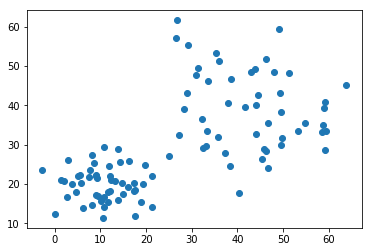

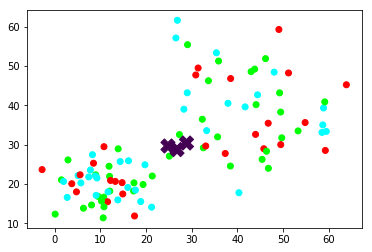

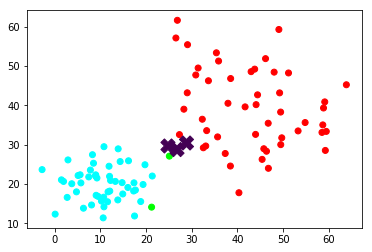

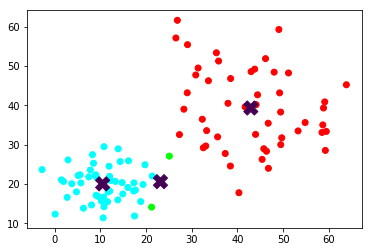

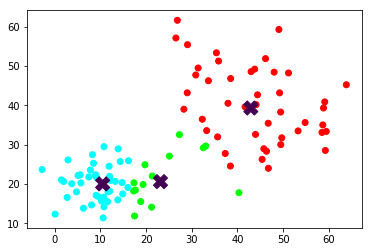

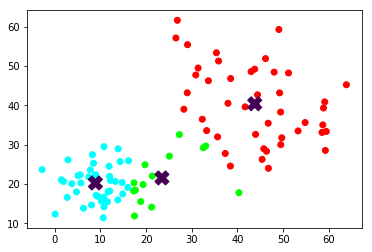

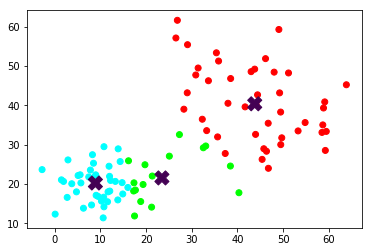

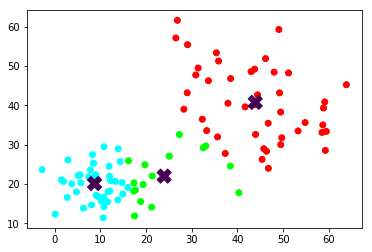

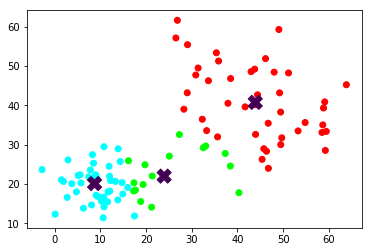

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

INITIAL_CLUSTER_RANDOM_SEED = 6  # 0, 6
NUM_POINTS = 50

np.random.seed(0) # Always generate the same data points

# Use two Gaussians to generate two clusters of points
data_1 = np.concatenate(
    (
        np.random.normal(10, 5, (NUM_POINTS, 1)),
        np.random.normal(20, 5, (NUM_POINTS, 1)),
    ),
    axis=1
)

data_2 = np.concatenate(
    (
        np.random.normal(40, 10, (NUM_POINTS, 1)),
        np.random.normal(40, 10, (NUM_POINTS, 1)),
    ),
    axis=1
)

# Merge the two sets of points into one
data = np.concatenate(
    (
        data_1,
        data_2,
    ),
    axis=0
)

plt.scatter(data[:,0], data[:,1])
plt.show()

############

np.random.seed(INITIAL_CLUSTER_RANDOM_SEED)
bestLabels = np.random.randint(0,3,size=(NUM_POINTS*2))

for max_iters in range(4):

    center_0 = np.mean(data[ bestLabels == 0, : ], axis=0)
    center_1 = np.mean(data[ bestLabels == 1, : ], axis=0)
    center_2 = np.mean(data[ bestLabels == 2, : ], axis=0)
    center_0 = center_0.reshape( (1,2) )
    center_1 = center_1.reshape( (1,2) )
    center_2 = center_2.reshape( (1,2) )
    centers = np.concatenate( (center_0, center_1, center_2), axis=0 )
    
    # Make sure colour don't swap, as labelling can get reversed
    COLORS = np.array((
        (1,0,0),
        (0,1,0),
        (0,1,1),
    ))

    # Display, after shifting centers
    plt.scatter(data[:,0], data[:,1], c=COLORS[bestLabels.flatten()])
#    plt.scatter( centers[:,0], centers[:,1], marker="X", c=COLORS, s=200) # WITH COLORS
    plt.scatter( centers[:,0], centers[:,1], marker="X", c=(0,0,0), s=200)
    plt.show()

    dist_to_c0 = np.sum( (data[:,:] - centers[0,:]) ** 2, axis=1 )
    dist_to_c1 = np.sum( (data[:,:] - centers[1,:]) ** 2, axis=1 )
    dist_to_c2 = np.sum( (data[:,:] - centers[2,:]) ** 2, axis=1 )

    bestLabels[(dist_to_c0 <= dist_to_c1) & (dist_to_c0 <= dist_to_c2)] = 0
    bestLabels[(dist_to_c1 <= dist_to_c0) & (dist_to_c1 <= dist_to_c2)] = 1
    bestLabels[(dist_to_c2 <= dist_to_c0) & (dist_to_c2 <= dist_to_c1)] = 2

    # Display, after relabelling
    plt.scatter(data[:,0], data[:,1], c=COLORS[bestLabels.flatten()])
    plt.scatter( centers[:,0], centers[:,1], marker="X", c=(0,0,0), s=200)
    plt.show()


